# 4. Análisis predictivo con un árbol de decisión

#### 4.1 Dependencias

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split

#### 4.2 Cargamos el archivo

In [4]:
ruta_fichero = '../data_generated/datos_meteorologicos_modificados_sin_prec.csv'
fichero = pd.read_csv(ruta_fichero)
fichero

,altitud,tmed,tmin,tmax,dir,velmedia,racha,presMax,presMin,lluvia
0,115,23.5,19.7,27.3,7.0,3.1,8.1,1005.4,1003.1,False
1,410,26.2,17.4,35.1,19.0,4.2,11.4,975.0,971.6,False
2,808,27.0,19.0,35.0,12.0,2.2,8.3,931.8,928.9,False
3,582,23.8,13.0,34.5,99.0,1.4,4.2,957.9,953.3,False
4,17,23.3,18.6,28.0,20.0,2.2,6.1,1021.5,1019.5,False
...,...,...,...,...,...,...,...,...,...,...
7591,23,19.2,13.5,24.3,22.0,2.5,8.9,974.0,969.3,False
7592,8,18.6,14.3,23.0,26.0,5.8,16.9,1014.9,1010.3,False
7593,4,17.8,11.0,24.5,22.0,2.5,8.9,974.0,969.3,False
7594,769,12.6,10.2,15.1,23.0,7.2,19.7,926.7,919.2,True


In [6]:
# Convertir la variable de salida (lluvia) a factor
fichero['lluvia'] = pd.Categorical(fichero['lluvia'])

In [7]:
X = fichero.drop('lluvia', axis=1)  # Features
y = fichero['lluvia']  # Variable de salida

# División en 80/20 para entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear conjuntos de entrenamiento y prueba
conjunto_train = pd.concat([X_train, y_train], axis=1)
conjunto_val = pd.concat([X_val, y_val], axis=1)


# Creamos dos conjuntos para poner las predicciones del train y test
conjunto_train_eval = conjunto_train.copy()
conjunto_validation_eval = conjunto_val.copy()

In [8]:
precision_train = {}
precision_val = {}

In [9]:
# Configurar la validación cruzada (CV)
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=150)

# ENTRENAMIENTO

In [10]:
# Definir el clasificador de árbol de decisiones
dt_classifier = DecisionTreeClassifier()

alpha_range = [i * 0.0005 for i in range(11)]

# Definir los parámetros que deseas ajustar
param_grid = {'ccp_alpha': np.arange(0, 0.1, 0.0005),
              'min_samples_split': [2, 5, 10],  # Numero minimo de observaciones en el nodo para dividir
              'min_samples_leaf': [1, 5, 10],   # Numero minimo de observaciones en el nodo hoja
              'criterion': ['gini', 'entropy']}

In [11]:
# Definir la métrica de evaluación (Accuracy)
scorer = make_scorer(accuracy_score)

# Configurar la búsqueda de hiperparámetros utilizando GridSearchCV
grid_search = GridSearchCV(dt_classifier, param_grid, scoring=scorer, cv=cv)

In [12]:
# Entrenar el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_

# Imprimir resultados
print("Mejor modelo:", best_model)

Mejor modelo: DecisionTreeClassifier(ccp_alpha=0.0005)


In [13]:
# Evaluar el modelo en el conjunto de entrenamiento
y_val_pred = best_model.predict(X_train.values)
accuracy_train = accuracy_score(y_train, y_val_pred)

# Imprimir la precisión en el conjunto de entrenamiento
print("Precisión en el conjunto de entrenamiento:", accuracy_train)

Precisión en el conjunto de entrenamiento: 0.859776168531929


C:\Users\alvar\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [14]:
y_train_pred = best_model.predict(X_train)
confusion_mat_train = confusion_matrix(y_train, y_train_pred)

# Imprimir la matriz de confusión y la precisión en el conjunto de entrenamiento
print("Matriz de Confusión (Train):")
print(confusion_mat_train)

Matriz de Confusión (Train):
[[3116  490]
 [ 362 2108]]


In [15]:
# Obtener los resultados del grid search
resultados_df = pd.DataFrame(grid_search.cv_results_)

# Imprimir información sobre cada fold
for fold in range(10):  # Numero de splits en tu validación cruzada
    fold_column = f'split{fold}_test_score'
    print(f"Información para el Fold {fold + 1}:")
    print(f"  Mejor valor de ccp_alpha: {resultados_df['param_ccp_alpha'][resultados_df[fold_column].idxmax()]}")
    print(f"  Precisión en el fold: {resultados_df[fold_column].max()}")
    print("\n")

Información para el Fold 1:
  Mejor valor de ccp_alpha: 0.0005
  Precisión en el fold: 0.805921052631579


Información para el Fold 2:
  Mejor valor de ccp_alpha: 0.0005
  Precisión en el fold: 0.7648026315789473


Información para el Fold 3:
  Mejor valor de ccp_alpha: 0.0015
  Precisión en el fold: 0.7976973684210527


Información para el Fold 4:
  Mejor valor de ccp_alpha: 0.001
  Precisión en el fold: 0.7927631578947368


Información para el Fold 5:
  Mejor valor de ccp_alpha: 0.001
  Precisión en el fold: 0.8009868421052632


Información para el Fold 6:
  Mejor valor de ccp_alpha: 0.0005
  Precisión en el fold: 0.7845394736842105


Información para el Fold 7:
  Mejor valor de ccp_alpha: 0.0015
  Precisión en el fold: 0.7940691927512356


Información para el Fold 8:
  Mejor valor de ccp_alpha: 0.001
  Precisión en el fold: 0.7792421746293245


Información para el Fold 9:
  Mejor valor de ccp_alpha: 0.001
  Precisión en el fold: 0.771004942339374


Información para el Fold 10:
  Mej

In [16]:
fichero.dtypes

altitud        int64
tmed         float64
tmin         float64
tmax         float64
dir          float64
velmedia     float64
racha        float64
presMax      float64
presMin      float64
lluvia      category
dtype: object

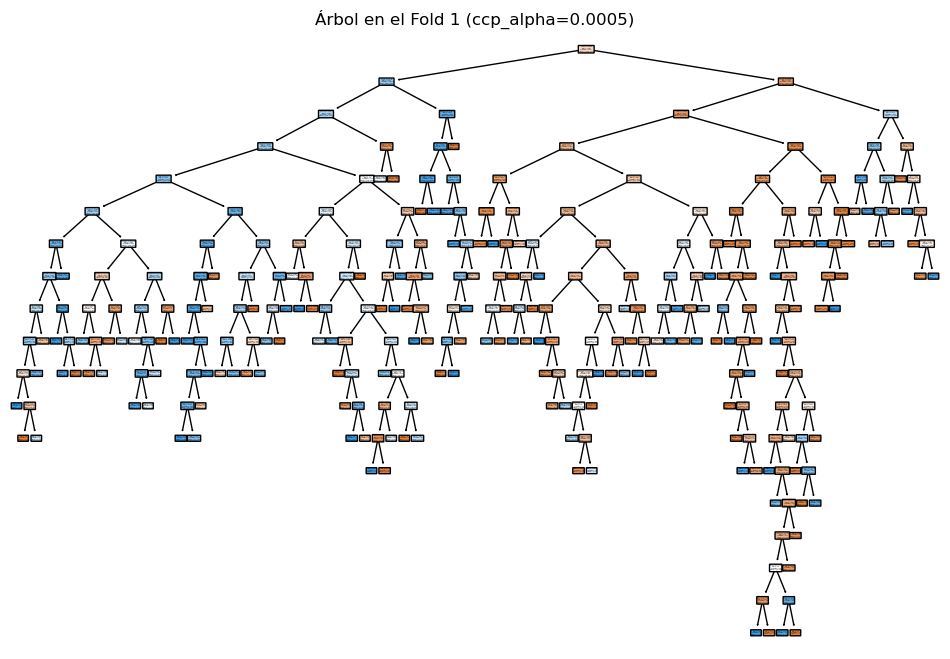

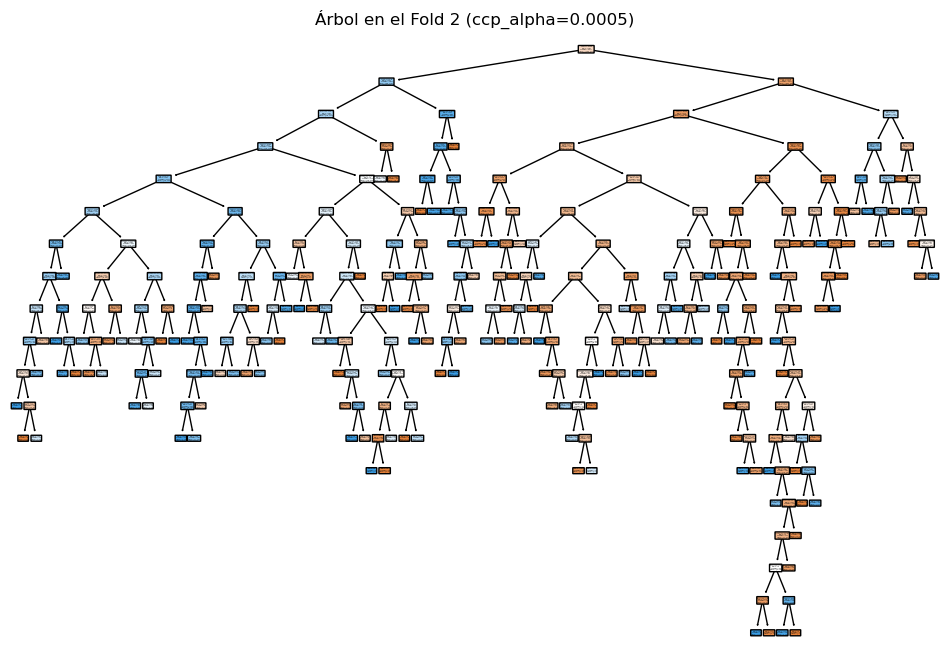

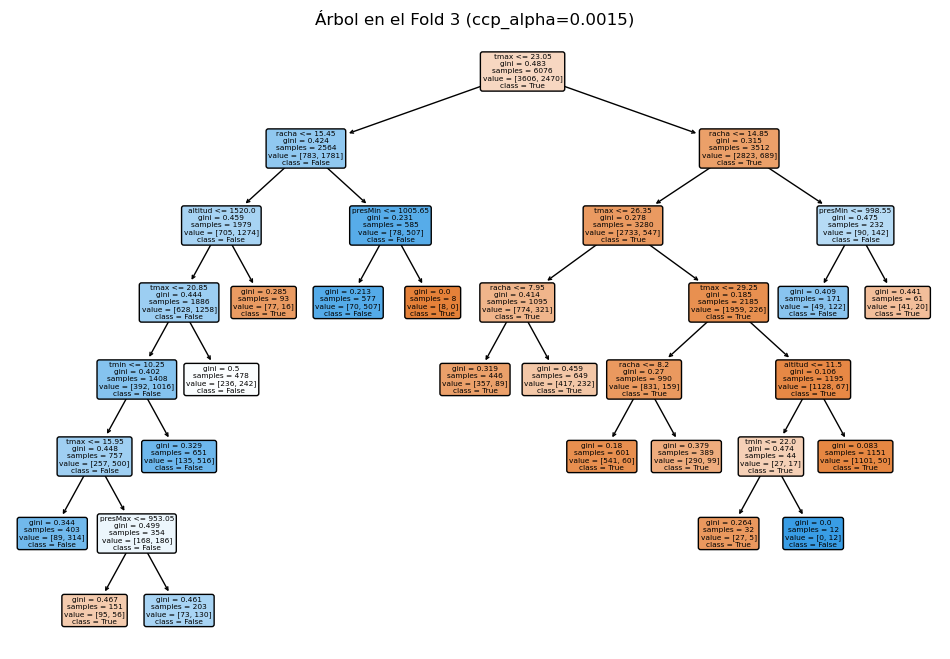

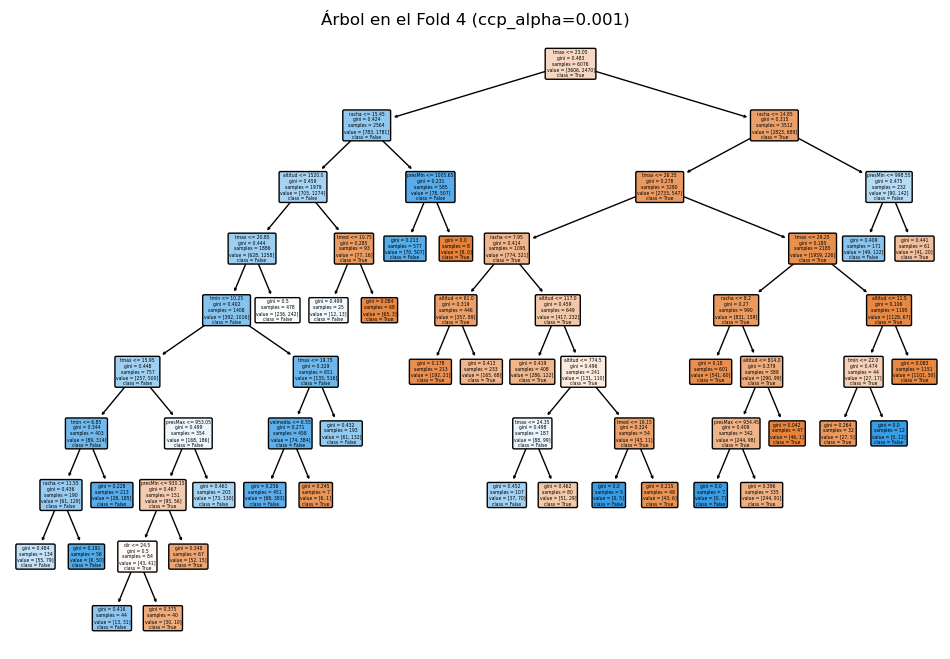

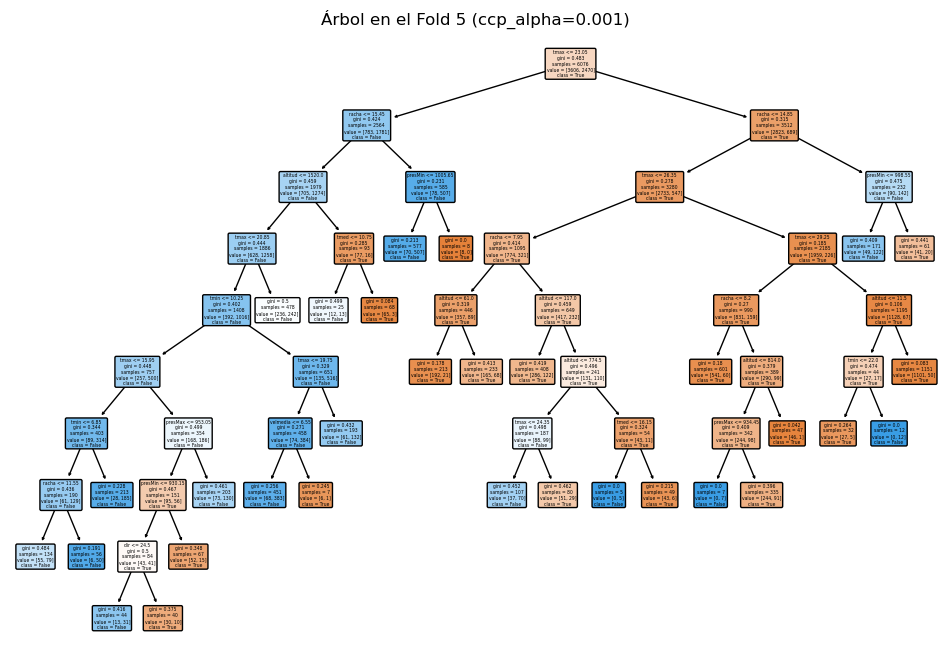

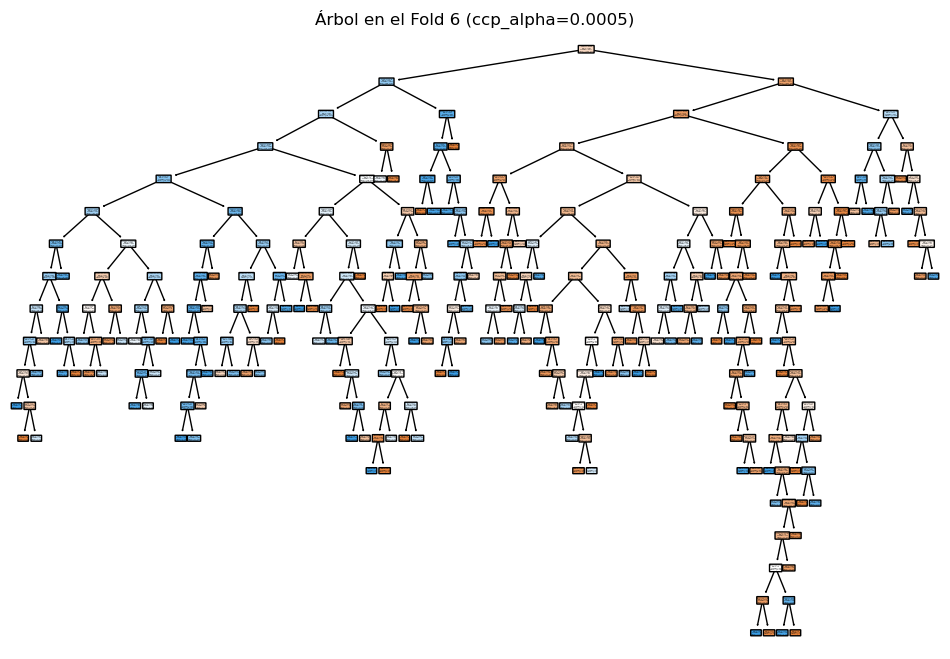

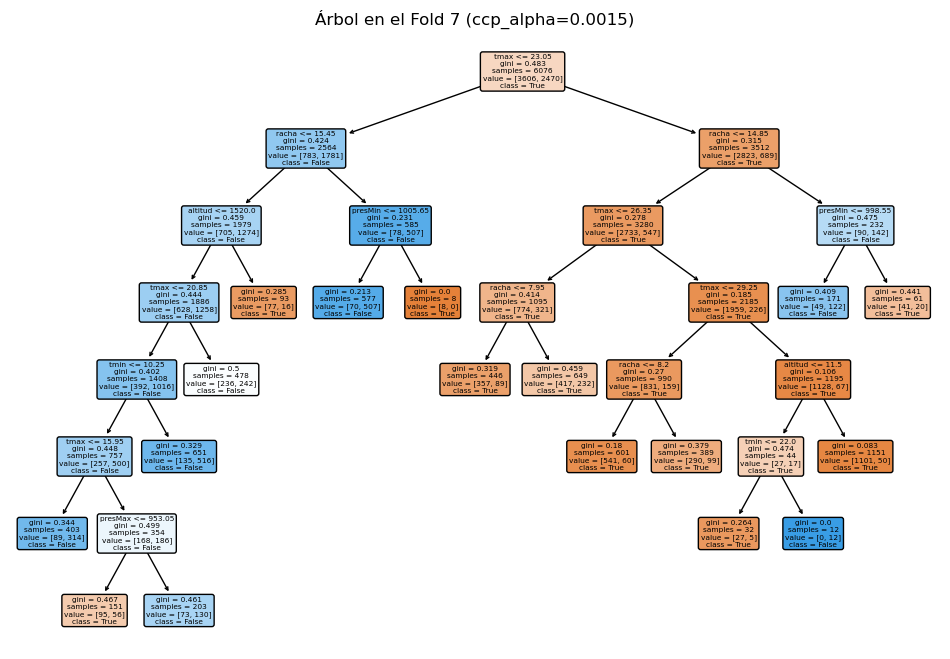

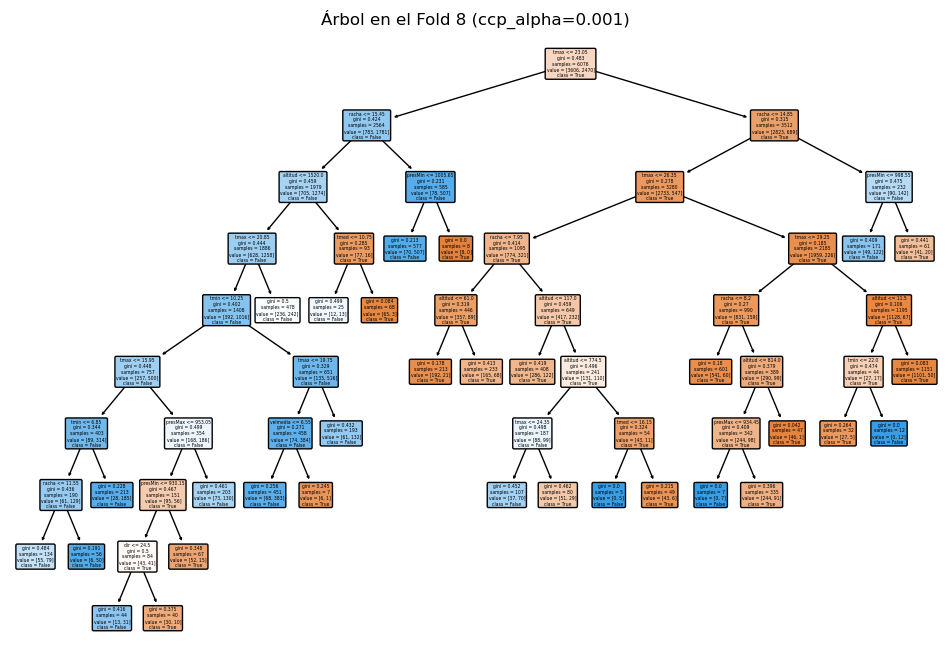

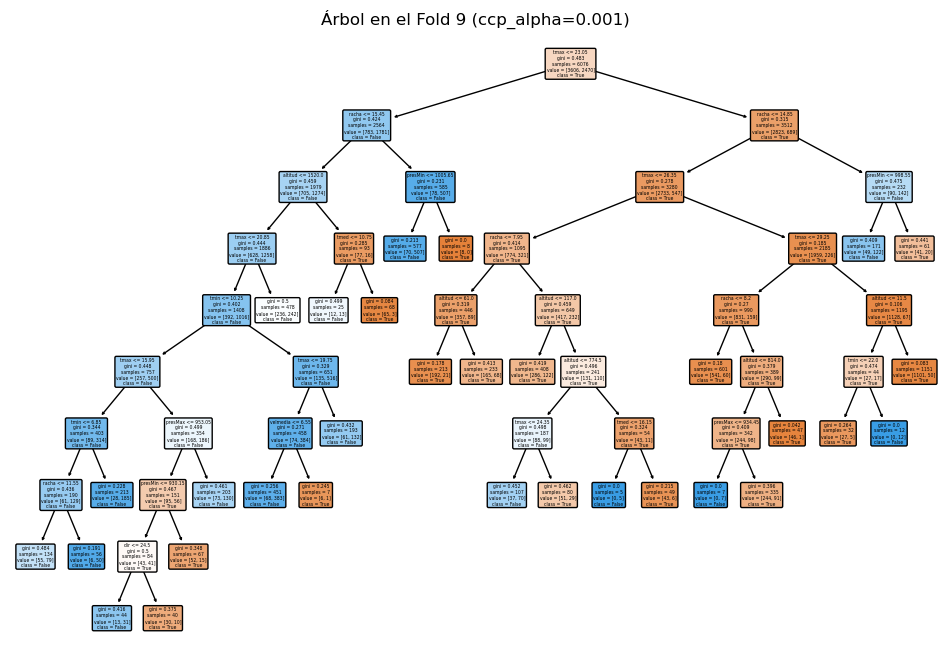

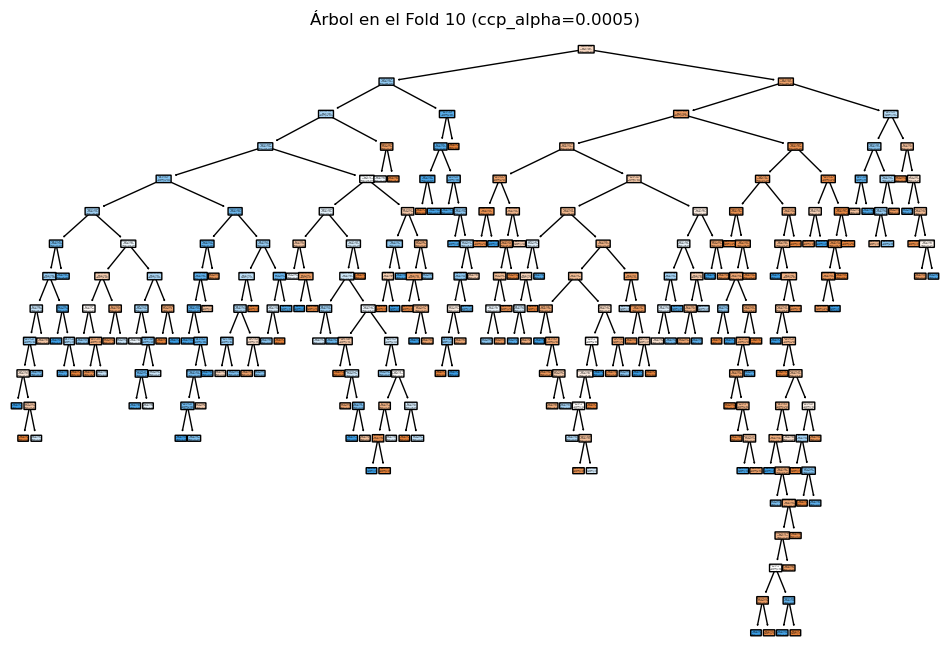

In [17]:
from sklearn.tree import plot_tree

# Obtener los resultados del grid search
resultados_df = pd.DataFrame(grid_search.cv_results_)

# Iterar sobre los splits y visualizar los árboles
for fold in range(10):  # Ajusta esto según el número de splits en tu validación cruzada
    fold_column = f'split{fold}_test_score'
    best_alpha = resultados_df['param_ccp_alpha'][resultados_df[fold_column].idxmax()]

    # Crear y entrenar un árbol con el mejor ccp_alpha en el fold actual
    tree_model = DecisionTreeClassifier(ccp_alpha=best_alpha, random_state=150)
    tree_model.fit(X_train, y_train)

    # Visualizar el árbol
    plt.figure(figsize=(12, 8))
    plot_tree(tree_model, filled=True, feature_names=['altitud', 'tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax', 'presMin'], class_names=['True', 'False'], rounded=True)
    plt.title(f"Árbol en el Fold {fold + 1} (ccp_alpha={best_alpha})")
    plt.show()


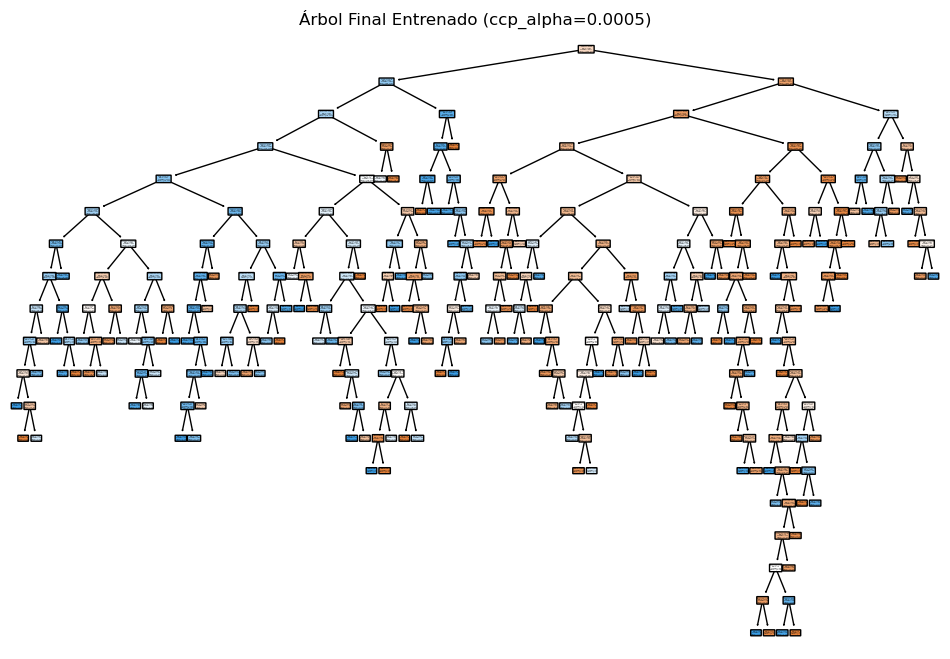

In [18]:
# Visualizar el árbol final entrenado con el mejor ccp_alpha
best_alpha_final = grid_search.best_params_['ccp_alpha']
final_tree_model = DecisionTreeClassifier(ccp_alpha=best_alpha_final, random_state=150)
final_tree_model.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(tree_model, filled=True, feature_names=['altitud', 'tmed', 'tmin', 'tmax', 'dir', 'velmedia', 'racha', 'presMax', 'presMin'], class_names=['True', 'False'], rounded=True)
plt.title(f"Árbol Final Entrenado (ccp_alpha={best_alpha_final})")
plt.show()

In [19]:
# Obtener el mejor modelo después de la búsqueda de hiperparámetros
best_model = grid_search.best_estimator_

# Obtener la importancia de las variables
importances = best_model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las variables
importances_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Ordenar el DataFrame por importancia en orden descendente
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Imprimir la importancia de las variables
print("Importancia de las variables:")
print(importances_df)

Importancia de las variables:
    Feature  Importance
3      tmax    0.536099
0   altitud    0.129786
6     racha    0.123668
2      tmin    0.055223
4       dir    0.042118
8   presMin    0.040207
7   presMax    0.036214
1      tmed    0.025102
5  velmedia    0.011583


## VALIDATION

In [24]:
# Evaluar el modelo en el conjunto de evaluación
y_val_pred = best_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_val_pred)
confusion_mat_val = confusion_matrix(y_val, y_val_pred)

# Imprimir la matriz de confusión y la precisión en el conjunto de evaluación
print("Matriz de Confusión (Validación):")
print(confusion_mat_val)

Matriz de Confusión (Validación):
[[736 170]
 [156 458]]


In [23]:
print("Precisión en el conjunto de validación:", accuracy_val)

Precisión en el conjunto de validación: 0.7855263157894737


# CONCLUSIONES

In [25]:
print("Precisión en el conjunto de train:", accuracy_train)
print("Precisión en el conjunto de validación:", accuracy_val)

Precisión en el conjunto de train: 0.859776168531929
Precisión en el conjunto de validación: 0.7855263157894737


## Rendimiento General

El modelo tiene una precisión del 85.98% en el conjunto de entrenamiento y del 78.55% en el conjunto de validación. Esto indica un rendimiento generalmente bueno, pero sugiere que el modelo podría estar ligeramente sobreajustado, ya que funciona mejor en los datos de entrenamiento que en los de validación.

## Análisis Matriz de Confusión - Entrenamiento

- Verdaderos Positivos (VP): 3116. El modelo predijo correctamente 3116 instancias positivas.
- Falsos Positivos (FP): 490. El modelo predijo incorrectamente 490 instancias como positivas.
- Falsos Negativos (FN): 362. El modelo pasó por alto 362 instancias positivas reales.
- Verdaderos Negativos (VN): 2108. El modelo predijo correctamente 2108 instancias negativas.

La matriz de confusión en el conjunto de entrenamiento muestra un equilibrio razonable entre VP y VN, pero con una cantidad significativa de FP y FN.

## Análisis Matriz de Confusión - Validación

- VP: 736. Menor número de predicciones correctas de instancias positivas comparado con el entrenamiento.
- FP: 170. Menos errores de tipo FP comparado con el entrenamiento.
- FN: 156. Similar en proporción a los FP, lo que indica un equilibrio en la identificación de clases.
- VN: 458. Menor número de predicciones correctas de instancias negativas comparado con el entrenamiento.

## Resumen

La disminución en la precisión del conjunto de validación en comparación con el conjunto de entrenamiento sugiere un sobreajuste. Esto significa que el modelo puede estar demasiado ajustado a los datos de entrenamiento y no generaliza tan bien a nuevos datos.